In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys, math
from tqdm.notebook import tqdm
import copy

import csv
import re

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from einops import rearrange, reduce, repeat

In [3]:
import parser
import transformer
import longrange
import dataset
import train
import util

In [4]:
ids_book = parser.book2ids()

In [4]:
ds_train, ds_test = dataset.load_dataset(tqdm=tqdm)

Did NOT find existing dataset at ../data/datasets.pkl, creating new one


0it [00:00, ?it/s]

Loading 3037 books


  0%|          | 0/3037 [00:00<?, ?it/s]

'utf-8' codec can't decode byte 0xa3 in position 894: invalid start byte
arrays used as indices must be of integer (or boolean) type


In [5]:
ds_train, ds_test = dataset.load_dataset(tqdm=tqdm)

Found existing dataset at ../data/datasets.pkl


In [1]:
# ds_train

In [77]:
word2freq, fbin2wordset, word2fbin = calc_word_freq_bins(tqdm=tqdm)

0it [00:00, ?it/s]

In [78]:
fbin2size = [len(i) for i in fbin2wordset]
fbin2prob = [sum([word2freq[word] for word in i]) for i in fbin2wordset]

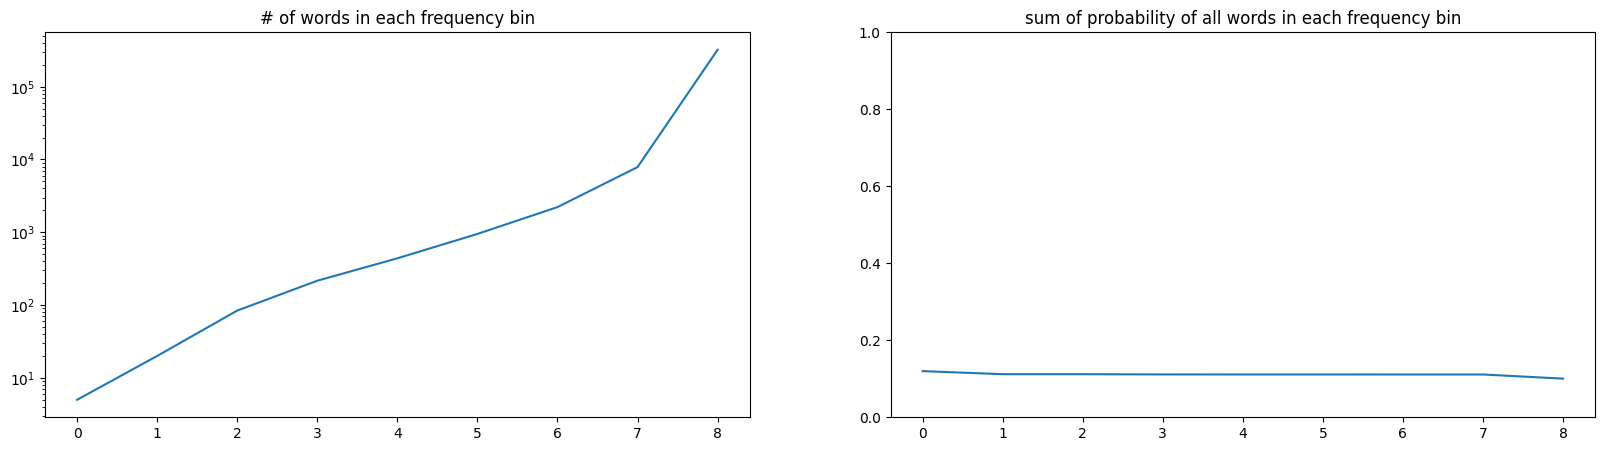

In [79]:
plt.figure(figsize=(20, 5))
plt.subplot(121); plt.plot(fbin2size); plt.yscale('log')
plt.title('# of words in each frequency bin')
plt.subplot(122); plt.plot(fbin2prob); plt.ylim(0, 1)
plt.title('sum of probability of all words in each frequency bin')
plt.show()

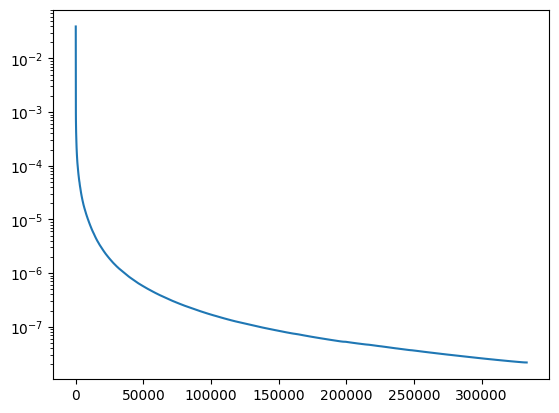

In [80]:
plt.plot(word2freq.values())
plt.yscale('log')

In [27]:
text_book = parser.book2text('../data/Gutenberg/txt/Abraham Lincoln___Lincoln Letters.txt')

In [28]:
import nltk#.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /afs/csail.mit.edu/u/a/akumar01/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
ds_train, ds_test = dataset.load_dataset(tqdm=tqdm)

Did NOT find existing dataset at ../data/datasets.pkl, creating new one


0it [00:00, ?it/s]

Loading 3037 books


  0%|          | 0/3037 [00:00<?, ?it/s]

'utf-8' codec can't decode byte 0xa3 in position 894: invalid start byte
arrays used as indices must be of integer (or boolean) type


In [ ]:
ds_train, ds_test = dataset.load_dataset(tqdm=tqdm)

In [175]:
len(ds_train)

80

In [176]:
data = ds_train['../data/Gutenberg/txt/Andrew Lang___Adventures among Books.txt']

In [177]:
data['words']

array(['adventures', 'among', 'books', ..., 'i', 'can', 'edinburgh'],
      dtype='<U17')

In [187]:
data['fbin_fchars'][-100:]

array([-2, -2, -2,  1, -2, -2, -2, -2,  8, -2, -2, -2, -2, -2,  0, -2,  8,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,  8, -2, -2, -2, -2,
       -2, -2,  0, -2, -2, -2,  5, -2, -2, -2, -2, -2, -2,  6, -2, -2, -2,
       -2, -2, -2,  1, -2,  2, -2, -2,  7, -2, -2, -2, -2, -2, -2,  1, -2,
       -2, -2, -2,  1, -2,  2, -2, -2, -2, -2, -2, -2, -2, -2, -2,  7, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
      dtype=int8)

In [190]:
word2fbin['i']

1

In [191]:
# data['text']